In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('review_shopping.csv', sep=',', names=['TEXT','TOPIC'], header=None)
df

,TEXT,TOPIC
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,การบริการ
1,สินค้าด้อยคุณภาพ,คุณภาพสินค้า
2,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,การขนส่ง
3,ส่งช้าจัง รอนานมาก ยกเลิกก้อไม่ได้,การขนส่ง
4,แย่มากกกกกกค่ะ เอาของพังมาให้ฉุนมาดค่ะไม่พอใจเ...,คุณภาพสินค้า
...,...,...
118,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บ...,คุณภาพสินค้า
119,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,คุณภาพสินค้า
120,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,การขนส่ง
121,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท ...,การบริการ


In [3]:
df['TOPIC'].value_counts()

คุณภาพสินค้า    61
การบริการ       31
การขนส่ง        25
ราคา             6
Name: TOPIC, dtype: int64

In [4]:
from pythainlp.corpus.common import thai_stopwords

thai_stopwords = list(thai_stopwords())
thai_stopwords

['กัน',
 'คุณๆ',
 'จึง',
 'ซะจน',
 'ทัน',
 'หมด',
 'จรดกับ',
 'แห่งไหน',
 'ก็ได้',
 'ทำให้',
 'พอกัน',
 'กว้าง',
 'ไง',
 'จัดการ',
 'ครั้งกระนั้น',
 'ขณะ',
 'ต่างๆ',
 'เป็นต้นมา',
 'มั้ยเนี่ย',
 'ภายหน้า',
 'นอกจากว่า',
 'ถ้า',
 'น้อยกว่า',
 'เปลี่ยน',
 'บางกว่า',
 'อาจเป็น',
 'ลง',
 'ประการใด',
 'ด้วยเหตุนั้น',
 'ทำไร',
 'จ้า',
 'จากนี้',
 'สูงสุด',
 'เป็นอันๆ',
 'มั้ย',
 'ครานั้น',
 'เริ่ม',
 'ยืนยาว',
 'บางๆ',
 'จนเมื่อ',
 'ด้วยเหตุนี้',
 'ทั้งคน',
 'พอแล้ว',
 'ฝ่าย',
 'แต่นั้น',
 'ครั้งละ',
 'สุด',
 'อันละ',
 'เพียงเพื่อ',
 'แค่ไหน',
 'ครั้งที่',
 'ตลอดมา',
 'อันๆ',
 'ถึงแม้จะ',
 'คล้าย',
 'กระทั่ง',
 'เช่นดังก่อน',
 'ยัง',
 'ได้รับ',
 'ขณะใดๆ',
 'ทั้งๆ',
 'นั่น',
 'แต่ไร',
 'ระยะ',
 'ขณะที่',
 'หลัง',
 'เข้า',
 'เท่ากับ',
 'ตลอดวัน',
 'ปรับ',
 'จนบัดนี้',
 'สมัยโน้น',
 'ส่วนนั้น',
 'ครั้งก่อน',
 'เพราะว่า',
 'แค่',
 'พวกนั้น',
 'กันนะ',
 'ค่อยไปทาง',
 'คิดว่า',
 'ดั่งกับว่า',
 'นั้น',
 'แค่จะ',
 'อันที่',
 'พวกนู้น',
 'ให้ดี',
 'พึง',
 'เยอะ',
 'ยังคง',
 'นั้นไว',
 'แล้วกัน',
 'ที

In [5]:
from pythainlp import word_tokenize

In [6]:
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() if word.lower not in thai_stopwords)
    
    return final

In [7]:
df['TEXT TOKENS'] = df['TEXT'].apply(text_process)
df

,TEXT,TOPIC,TEXT TOKENS
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,การบริการ,เกลียด ชอบ หลอก ให้ สั่งซื้อ ที่ไหนได้ ไม่ มี ...
1,สินค้าด้อยคุณภาพ,คุณภาพสินค้า,สินค้า ด้อย คุณภาพ
2,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,การขนส่ง,คือ เเบบ ผิดหวัง มาก เเย่ ที่สุด ได้ ของ มา ฝา...
3,ส่งช้าจัง รอนานมาก ยกเลิกก้อไม่ได้,การขนส่ง,ส่ง ช้า จัง รอ นาน มาก ยกเลิก ก้อ ไม่ ได้
4,แย่มากกกกกกค่ะ เอาของพังมาให้ฉุนมาดค่ะไม่พอใจเ...,คุณภาพสินค้า,แย่ มา กก กก กก ค่ะ เอา ของ พัง มา ให้ ฉุน มาด...
...,...,...,...
118,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บ...,คุณภาพสินค้า,สินค้า มีตำหนิ แย่มาก ไม่ ไหว เลย ถ้า มีตำหนิ ...
119,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,คุณภาพสินค้า,เปราะบาง มาก ความแข็งแรง น้อย มัน ง่าย ต่อ การ...
120,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,การขนส่ง,ขนส่ง ก็ ช้า สินค้า มีตำหนิ แพ็ค สินค้า ไม่ ดี...
121,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท ...,การบริการ,สินค้า เหมือน ของปลอม เนื่อ ครีม เหมือน ซอง 10...


In [8]:
from wordcloud import WordCloud, STOPWORDS

<function matplotlib.pyplot.show(close=None, block=None)>

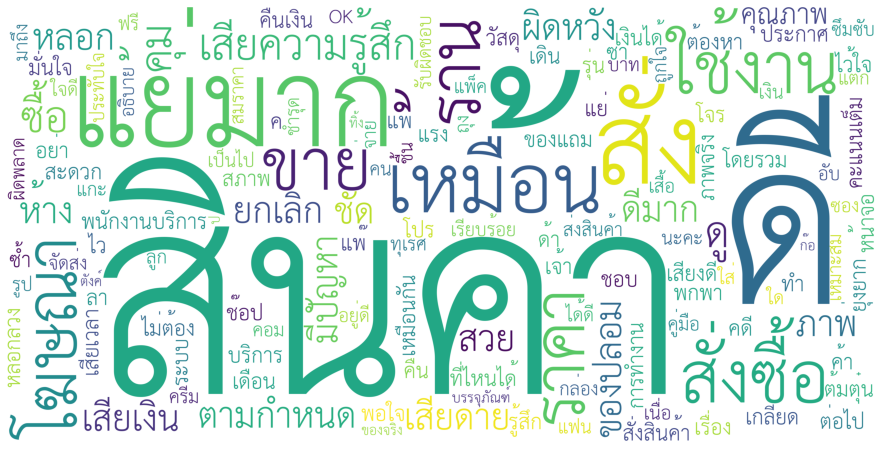

In [9]:
# Create frequency words by wordcloud

# frequency of word(Service Topic)
df_service = df[df['TOPIC']=='การบริการ']
service_word_all = " ".join(text for text in df_service['TEXT TOKENS'])
reg = r"[ก-๙a-zA-Z]+"
fp = 'THSarabunNew.ttf'

wordcloud = WordCloud(stopwords=thai_stopwords, background_color='white', max_words=2000, height=2000, width=4000, 
                       font_path=fp, regexp=reg).generate(service_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

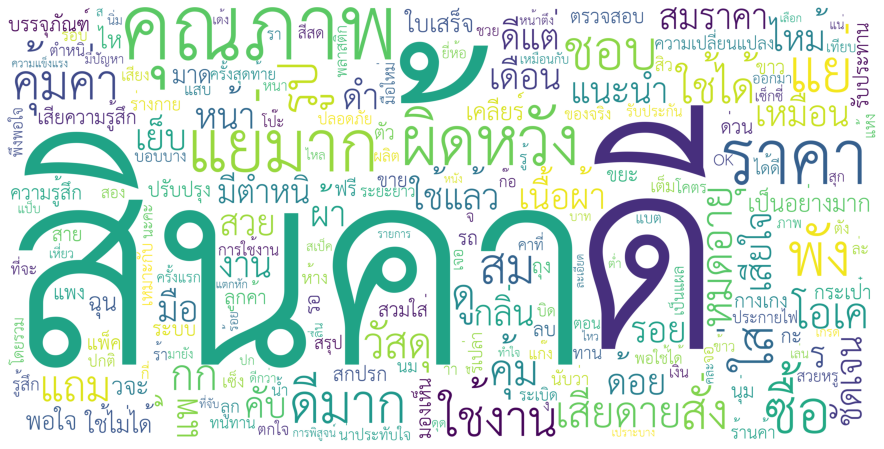

In [10]:
# frequency of word(Product Quality Topic)
df_productQuality = df[df['TOPIC']=='คุณภาพสินค้า']
productQuality_word_all = " ".join(text for text in df_productQuality['TEXT TOKENS'])

wordcloud = WordCloud(stopwords=thai_stopwords, background_color='white', max_words=2000, height=2000, width=4000, 
                       font_path=fp, regexp=reg).generate(productQuality_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

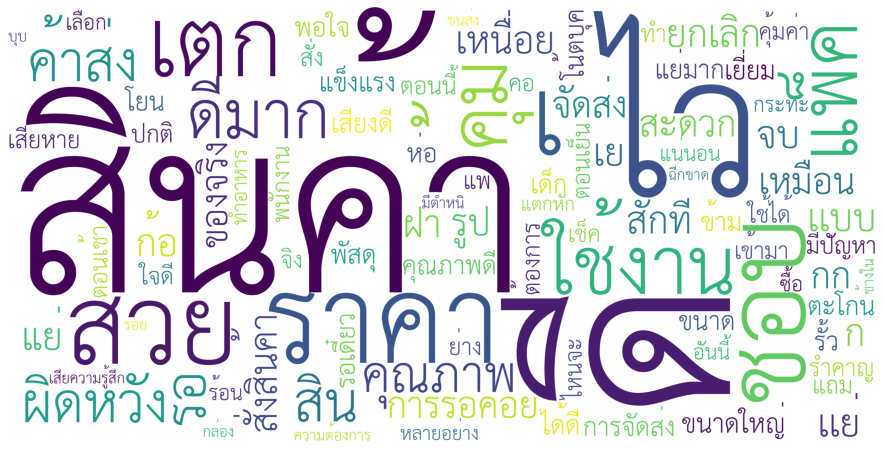

In [11]:
# frequencyof word(Transportation Quality Topic)
df_transportation = df[df['TOPIC']=='การขนส่ง']
transportation_word_all = " ".join(text for text in df_transportation['TEXT TOKENS'])

wordcloud = WordCloud(stopwords=thai_stopwords, background_color='white', max_words=2000, height=2000, width=4000, 
                       font_path=fp, regexp=reg).generate(transportation_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df[['TEXT TOKENS']]
y = df['TOPIC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['TEXT TOKENS'])
cvec.vocabulary_

{'สรุป': 241,
 'แพง': 348,
 'กว่า': 7,
 'ท้องตลาด': 141,
 'คะ': 50,
 'แย่มาก': 354,
 'เสีย': 315,
 'ความ': 44,
 'เนื้อผ้า': 300,
 'ดีแต่': 95,
 'ไม่': 385,
 'หนา': 261,
 'เซ็กซี่': 289,
 'โป๊ะ': 363,
 'คุณภาพ': 58,
 'สม': 239,
 'กับ': 10,
 'ราคา': 210,
 'สินค้า': 252,
 'วัสดุ': 233,
 'เหมือน': 326,
 'หมดอายุ': 266,
 'แล้ว': 356,
 'เหมาะสม': 325,
 'ใช้งาน': 369,
 'OK': 1,
 'ต่อ': 116,
 'ดู': 97,
 'ภาพ': 176,
 'จาก': 76,
 'คอม': 49,
 'ชัด': 82,
 'มาก': 182,
 'จัดส่ง': 75,
 'เร็ว': 311,
 'ดี': 93,
 'ของปลอม': 28,
 'เนื่อ': 299,
 'ครีม': 41,
 'ซอง': 88,
 '10': 0,
 'บาท': 157,
 'บรรจุภัณฑ์': 153,
 'ก๊อ': 20,
 'ป': 159,
 'มา': 181,
 'ของจริง': 27,
 'ใน': 374,
 'ห้าง': 272,
 'เลย': 312,
 'เสียดาย': 319,
 'ตังค์': 109,
 'ซื้อ': 90,
 'ทิ้ง': 134,
 'หลอกลวง': 269,
 'ต้มตุ๋น': 118,
 'เอา': 333,
 'ขาย': 29,
 'ร้าน': 221,
 'โจร': 359,
 'ส่ง': 258,
 'ของ': 26,
 'รวดเร็ว': 199,
 'ใหม่': 378,
 'ด้วย': 99,
 'โดยรวม': 360,
 'ให้': 379,
 'คะแนนเต็ม': 51,
 'ครับ': 36,
 'คือ': 56,
 'เเบบ': 334,
 'ผิดหวัง':

In [16]:
train_bow = cvec.transform(X_train['TEXT TOKENS'])

pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names(), index=X_train['TEXT TOKENS'])

,10,OK,กก,กระทะ,กระเป๋า,กลิ่น,กล่อง,กว่า,กะ,กัน,...,ไป,ไม่,ไม่ค่อย,ไม่ต้อง,ไว,ไว้,ไห,ไหม้,ไหล,ไหว
TEXT TOKENS,,,,,,,,,,,,,,,,,,,,,
สรุป แพง กว่า ท้องตลาด คะ แย่มาก เสีย ความ,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
เนื้อผ้า ดีแต่ ไม่ หนา เซ็กซี่ ดีแต่ ไม่ โป๊ะ คุณภาพ สม กับ ราคา,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
สินค้า คุณภาพ แย่มาก วัสดุ เหมือน หมดอายุ แล้ว,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
คุณภาพ เหมาะสม กับ ราคา ใช้งาน OK ต่อ ดู ภาพ จาก คอม ชัด มาก จัดส่ง เร็ว ดี,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
สินค้า เหมือน ของปลอม เนื่อ ครีม เหมือน ซอง 10 บาท บรรจุภัณฑ์ เหมือน ก๊อ ป มา ไม่ เหมือน ของจริง ใน ห้าง เลย เสียดาย ตังค์ ซื้อ มา ทิ้ง,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ซื้อ แล้ว ผิดหวัง สินค้า ไม่ มี คุณภาพ,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
จอ ใหญ่ มาก คุณภาพ เสียง ชัดเจน ดีมาก โดยรวม แล้ว คุ้มค่า มาก,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
เห็น แล้ว รู้สึก แย่ ไม่ มั่นใจ ใน สินค้า ร้าน นี้,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

LogisticRegression()

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['TEXT TOKENS'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

    การขนส่ง       0.44      0.50      0.47         8
   การบริการ       0.25      0.50      0.33         6
คุณภาพสินค้า       0.81      0.57      0.67        23

    accuracy                           0.54        37
   macro avg       0.50      0.52      0.49        37
weighted avg       0.64      0.54      0.57        37



In [35]:
my_text = 'โย่วๆ'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['คุณภาพสินค้า'], dtype=object)